# Import Library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import PorterStemmer
import re
import string
print("Done")

Done


# Preparation 

In [2]:
data_list = ["homedepot.com_204074796.csv", "homedepot.com_319247071.csv", "lowes.com_3286026.csv",
             "lowes.com_3380314.csv", "lowes.com_50280511.csv", "lowes.com_1003066162.csv", "lowes.com_5000026209.csv",
            "lowes.com_5001899855.csv"]

# read in data
df = pd.read_csv(data_list[0])
df.head()

,Market_place,URL,Product_name,SKU,Price,Currency,Subject,Author,Date,Review,Stars
0,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Tiny pool of water in the bowl.,GreatAim,"Nov 22, 2022",I purchased 4 of these toilets for my new hous...,1
1,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Cheap seat and lid,Dee2,"Sep 26, 2022","I recently bought the chair height, elongated ...",2
2,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Nice color and sits at a great height for gett...,HomeDepotCustomer,"Jun 15, 2022",Nice color and sits at a great height for gett...,4
3,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Great Value / Nice Product,DENISE,"Feb 8, 2022",This toilet is a great value and looks and per...,5
4,homedepot.com,https://www.homedepot.com/p/Glacier-Bay-2-Piec...,2-Piece 1.28 GPF High Efficiency Single Flush ...,686826,119.0,USD,Good value toilet,Tom_P,"Dec 25, 2021",Looks good - Easy install with no issues. The ...,4


Stars Counts

Text(0.5, 0, 'Review Stars')

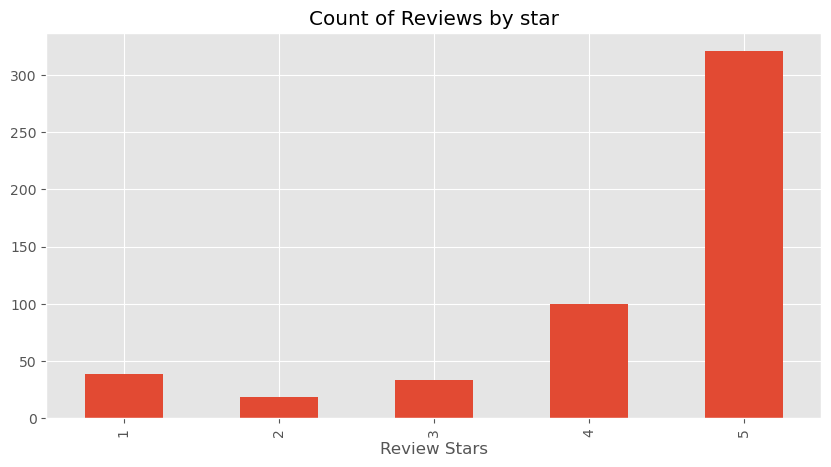

In [3]:
ax = df['Stars'].value_counts().sort_index()\
    .plot(kind= 'bar',
          title = 'Count of Reviews by star',
         figsize = (10,5))
ax.set_xlabel('Review Stars')

# Data

In [4]:
good = df[df["Stars"] >= 4]

bad = df[df["Stars"] <= 3]

In [5]:
good_reviews = good['Review']
good_reviews = pd.DataFrame(good_reviews)
good_reviews['Subject'] = good['Subject']
good_reviews['Stars'] = good['Stars']
good_reviews.dropna(inplace= True)
good_reviews.index = np.arange(0,len(good_reviews))
good_reviews['ID'] = np.arange(1,len(good_reviews)+1)
good_reviews

,Review,Subject,Stars,ID
0,Nice color and sits at a great height for gett...,Nice color and sits at a great height for gett...,4,1
1,This toilet is a great value and looks and per...,Great Value / Nice Product,5,2
2,Looks good - Easy install with no issues. The ...,Good value toilet,4,3
3,Rating provided by a verified purchaser,Rating provided by a verified purchaser...,4,4
4,Very elegant in appearance and it is very comf...,Very elegant in appearance and it is very comf...,4,5
...,...,...,...,...
240,"Easy to install, and leak free. Once in use, t...","Easy to install, and leak free. Once in use,...",4,241
241,It was easy to install. Works great. Thanks.,It was easy to install. Works great. Thanks....,5,242
242,Comes with almost everything. Missing the fres...,Get what you pay,4,243
243,Fit perfectly. Includes wax ring and bolts,Fit perfectly. Includes wax ring and bolts...,5,244


In [6]:
bad_reviews = bad['Review']
bad_reviews = pd.DataFrame(bad_reviews)
bad_reviews['Subject'] = bad['Subject']
bad_reviews['Stars'] = bad['Stars']
bad_reviews.dropna(inplace= True)
bad_reviews.index = np.arange(0,len(bad_reviews))
bad_reviews['ID'] = np.arange(1,len(bad_reviews)+1)
bad_reviews

,Review,Subject,Stars,ID
0,I purchased 4 of these toilets for my new hous...,Tiny pool of water in the bowl.,1,1
1,"I recently bought the chair height, elongated ...",Cheap seat and lid,2,2
2,Terrible product. Bowl won't stay full and the...,The only thing efficient is the malfunctioning.,1,3
3,This toilet is way to high. The actual measure...,Terrible,1,4
4,The first thing I noticed were several holes i...,"Holes in Bowl, Seat wont stay up",1,5
...,...,...,...,...
74,water will not stay in the bowl you have to fl...,water will not stay in the bowl you have to...,1,75
75,"After a bowel movement , the bowl will not tak...","After a bowel movement , the bowl will not tak...",2,76
76,I had American Standard toilet in my house for...,Worst toilet ever,1,77
77,No power to the flush very low water sorry I g...,No power to the flush very low water sorry I...,2,78


# VADER Seniment Scoring

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [8]:
res = {}
for i, row in tqdm(good_reviews.iterrows(), total = len(good_reviews)):
    review = row['Review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(review)
    


  0%|          | 0/245 [00:00<?, ?it/s]

In [9]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'ID'})
vaders = vaders.merge(good_reviews, how= 'left')
vaders.head()

,ID,neg,neu,pos,compound,Review,Subject,Stars
0,1,0.090,0.705,0.205,0.7584,Nice color and sits at a great height for gett...,Nice color and sits at a great height for gett...,4
1,2,0.000,0.427,0.573,0.9442,This toilet is a great value and looks and per...,Great Value / Nice Product,5
2,3,0.070,0.811,0.119,0.3071,Looks good - Easy install with no issues. The ...,Good value toilet,4
3,4,0.000,1.000,0.000,0.0000,Rating provided by a verified purchaser,Rating provided by a verified purchaser...,4
4,5,0.084,0.763,0.152,0.8656,Very elegant in appearance and it is very comf...,Very elegant in appearance and it is very comf...,4


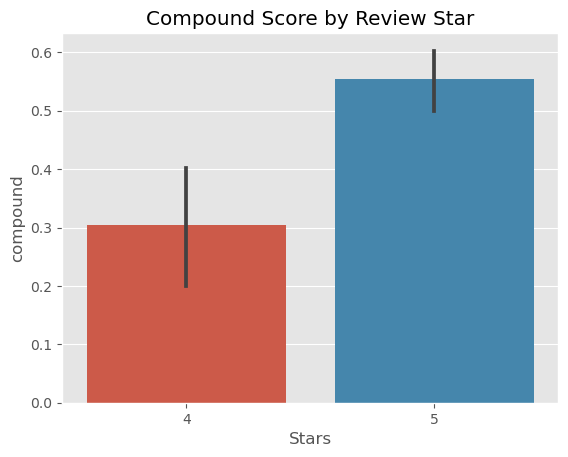

In [10]:
ax = sns.barplot(data= vaders, x = 'Stars', y= 'compound')
ax.set_title('Compound Score by Review Star')
plt.show()

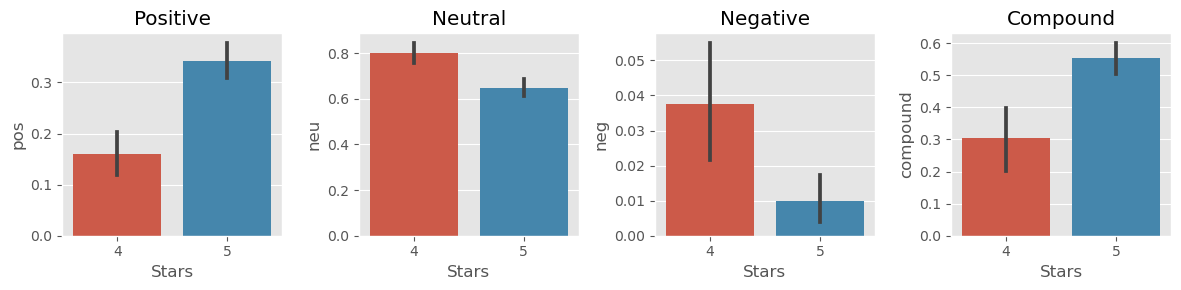

In [11]:
fig, axs = plt.subplots(1,4, figsize = (12,3))
sns.barplot(data= vaders, x= 'Stars', y= 'pos', ax = axs[0])
sns.barplot(data= vaders, x= 'Stars', y= 'neu', ax = axs[1])
sns.barplot(data= vaders, x= 'Stars', y= 'neg', ax = axs[2])
sns.barplot(data= vaders, x = 'Stars', y= 'compound', ax = axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

<font color ='blue'> Find the words

<font color = 'red'>Good review

In [12]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
ps = PorterStemmer()
good_tokenized_sentence_list = []
for i in good_reviews['Review']:
    i = i.lower()
    i = re.sub("[^0-9A-Za-z]"," ",i)
    i = re.sub(r'\w*\d+\w*','',i)
    words = word_tokenize(i)
    words_new = [j for j in words if j not in stopwords]
    w = [ps.stem(words) for words in words_new]
    good_tokenized_sentence_list.append(w)

good_reviews['Tokenized Review'] = good_tokenized_sentence_list
good_reviews

,Review,Subject,Stars,ID,Tokenized Review
0,Nice color and sits at a great height for gett...,Nice color and sits at a great height for gett...,4,1,"[nice, color, sit, great, height, get, happi, ..."
1,This toilet is a great value and looks and per...,Great Value / Nice Product,5,2,"[toilet, great, valu, look, perform, perfectli..."
2,Looks good - Easy install with no issues. The ...,Good value toilet,4,3,"[look, good, easi, instal, issu, includ, wax, ..."
3,Rating provided by a verified purchaser,Rating provided by a verified purchaser...,4,4,"[rate, provid, verifi, purchas]"
4,Very elegant in appearance and it is very comf...,Very elegant in appearance and it is very comf...,4,5,"[eleg, appear, comfort, littl, darker, expect,..."
...,...,...,...,...,...
240,"Easy to install, and leak free. Once in use, t...","Easy to install, and leak free. Once in use,...",4,241,"[easi, instal, leak, free, use, toilet, flush,..."
241,It was easy to install. Works great. Thanks.,It was easy to install. Works great. Thanks....,5,242,"[easi, instal, work, great, thank]"
242,Comes with almost everything. Missing the fres...,Get what you pay,4,243,"[come, almost, everyth, miss, fresh, water, ho..."
243,Fit perfectly. Includes wax ring and bolts,Fit perfectly. Includes wax ring and bolts...,5,244,"[fit, perfectli, includ, wax, ring, bolt]"


In [13]:
good_pos_word_list = []
good_neu_word_list = []
good_neg_word_list = []

for i in good_reviews['Tokenized Review']:
    for word in i:
        if (sia.polarity_scores(word)['compound'] >= 0.1):
            good_pos_word_list.append(word)
        elif (sia.polarity_scores(word)['compound'] <= -0.1):
            good_neg_word_list.append(word)
        else:
            good_neu_word_list.append(word)


<font color = 'green'> Positive words

In [14]:
x = np.array(good_pos_word_list)
pos_key_words = pd.DataFrame({'Positive word': np.unique(x)})
pos_key_words

,Positive word
0,accept
1,allow
2,attract
3,best
4,better
5,care
6,charm
7,clean
8,clear
9,comfort


<font color = 'green'> Neurtal words

In [15]:
y = np.array(good_neu_word_list)
neu_key_words = pd.DataFrame({'Neurtal word': np.unique(y)})
neu_key_words

,Neurtal word
0,abk
1,abl
2,actual
3,ada
4,add
...,...
602,would
603,year
604,yesterday
605,yet


<font color='green'>Negative word

In [16]:
z = np.array(good_neg_word_list)
neg_key_words = pd.DataFrame({'Negative word': np.unique(z)})
neg_key_words

,Negative word
0,anti
1,bad
2,complaint
3,crap
4,cut
5,defect
6,delay
7,difficult
8,disappoint
9,forget


<font color='red'>Bad review

In [17]:

bad_tokenized_sentence_list = []
for i in bad_reviews['Review']:
    i = i.lower()
    i = re.sub("[^0-9A-Za-z]"," ",i)
    i = re.sub(r'\w*\d+\w*','',i)
    words = word_tokenize(i)
    words_new = [j for j in words if j not in stopwords]
    w = [ps.stem(words) for words in words_new]
    bad_tokenized_sentence_list.append(w)

bad_reviews['Tokenized Review'] = bad_tokenized_sentence_list
bad_reviews

,Review,Subject,Stars,ID,Tokenized Review
0,I purchased 4 of these toilets for my new hous...,Tiny pool of water in the bowl.,1,1,"[purchas, toilet, new, hous, pool, water, bowl..."
1,"I recently bought the chair height, elongated ...",Cheap seat and lid,2,2,"[recent, bought, chair, height, elong, toilet,..."
2,Terrible product. Bowl won't stay full and the...,The only thing efficient is the malfunctioning.,1,3,"[terribl, product, bowl, stay, full, flush, po..."
3,This toilet is way to high. The actual measure...,Terrible,1,4,"[toilet, way, high, actual, measur, match, box..."
4,The first thing I noticed were several holes i...,"Holes in Bowl, Seat wont stay up",1,5,"[first, thing, notic, sever, hole, porcelain, ..."
...,...,...,...,...,...
74,water will not stay in the bowl you have to fl...,water will not stay in the bowl you have to...,1,75,"[water, stay, bowl, flush, go, plumber, take, ..."
75,"After a bowel movement , the bowl will not tak...","After a bowel movement , the bowl will not tak...",2,76,"[bowel, movement, bowl, take, everyth, away, m..."
76,I had American Standard toilet in my house for...,Worst toilet ever,1,77,"[american, standard, toilet, hous, year, one, ..."
77,No power to the flush very low water sorry I g...,No power to the flush very low water sorry I...,2,78,"[power, flush, low, water, sorri, got, one, we..."


In [18]:
bad_pos_word_list = []
bad_neu_word_list = []
bad_neg_word_list = []

for i in bad_reviews['Tokenized Review']:
    for word in i:
        if (sia.polarity_scores(word)['compound'] >= 0.1):
            bad_pos_word_list.append(word)
        elif (sia.polarity_scores(word)['compound'] <= -0.1):
            bad_neg_word_list.append(word)
        else:
            bad_neu_word_list.append(word)


<font color = 'green'> Positive words

In [19]:
x = np.array(bad_pos_word_list)
pos_key_words = pd.DataFrame({'Positive word': np.unique(x)})
pos_key_words

,Positive word
0,accept
1,best
2,better
3,bold
4,certain
5,champ
6,cheer
7,clean
8,cleaner
9,clear


<font color='green'> Neurtal words

In [20]:
y = np.array(bad_neu_word_list)
neu_key_words = pd.DataFrame({'Neurtal word': np.unique(y)})
neu_key_words

,Neurtal word
0,abl
1,acknowledg
2,action
3,actual
4,ad
...,...
577,would
578,write
579,ye
580,year


<font color='green'>Negative word

In [21]:
z = np.array(bad_neg_word_list)
neg_key_words = pd.DataFrame({'Negative word': np.unique(z)})
neg_key_words

,Negative word
0,aggress
1,annoy
2,avoid
3,bad
4,broke
5,crap
6,cut
7,defect
8,difficult
9,disappoint


<font color = 'blue'> Bigram and Trigram

In [25]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words= stoplist, ngram_range=(2,3))

ngrams = c_vec.fit_transform(good_reviews['Review'])

count_values = ngrams.toarray().sum(axis = 0)

vocab = c_vec.vocabulary_

ngram_df = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],reverse= True)
                       ).rename(columns= {0:'frequency', 1:'bigram/trigram'})
ngram_df

,frequency,bigram/trigram
0,37,easy install
1,36,verified purchaser
2,36,rating provided verified
3,36,rating provided
4,36,provided verified purchaser
...,...,...
3782,1,100 separate
3783,1,100 handicap restroom
3784,1,100 handicap
3785,1,10 heavy sturdy


In [27]:
from textblob import TextBlob

ngram_df['Polarity score'] = ngram_df['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
ngram_df['Subjectivity'] = ngram_df['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)
ngram_df

,frequency,bigram/trigram,Polarity score,Subjectivity
0,37,easy install,0.433333,0.833333
1,36,verified purchaser,0.000000,0.000000
2,36,rating provided verified,0.000000,0.000000
3,36,rating provided,0.000000,0.000000
4,36,provided verified purchaser,0.000000,0.000000
...,...,...,...,...
3782,1,100 separate,0.000000,0.000000
3783,1,100 handicap restroom,0.000000,0.000000
3784,1,100 handicap,0.000000,0.000000
3785,1,10 heavy sturdy,-0.200000,0.500000


In [29]:
sia.polarity_scores(ngram_df.loc[,'bigram/trigram'])

SyntaxError: invalid syntax (3810398019.py, line 1)

In [ ]:
from nltk import bigrams
from nltk import trigrams
from nltk import ngrams

# Roberta Pretrained Model (Working on)

In [ ]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax
#import pytorch

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
